In [3]:
import os
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from PIL import Image
from tensorflow.keras.layers import Conv2D

In [4]:
root_dir = os.path.dirname(os.path.dirname(os.getcwd()))

if root_dir not in sys.path:
    sys.path.append(root_dir)

import config

In [5]:
model_path = os.path.join(root_dir, 'models', 'checkpoint_20-0.81.h5')
model = load_model(model_path)

In [6]:
for layer in model.layers:
    if isinstance(layer, Conv2D):
        config = layer.get_config()
        filters = config['filters']
        kernel_size = config['kernel_size']

        print(f"Layer {layer.name} has {filters} filters with kernel size: {kernel_size}")

Layer conv2d has 32 filters with kernel size: (3, 3)
Layer conv2d_1 has 64 filters with kernel size: (2, 2)
Layer conv2d_2 has 128 filters with kernel size: (3, 3)
Layer conv2d_3 has 256 filters with kernel size: (1, 1)
Layer conv2d_4 has 256 filters with kernel size: (2, 2)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 698, 698, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 349, 349, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 348, 348, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 174, 174, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 172, 172, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 86, 86, 128)       0

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
test_generator = test_datagen.flow_from_directory(
    directory=config.serving_set_dir,
    target_size=config.serving_image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 7200 images belonging to 2 classes.


In [5]:
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()

225/225 [==============================] - 810s 4s/step


In [6]:
true_labels = test_generator.classes

In [7]:
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [8]:
cm = confusion_matrix(true_labels, predicted_classes)

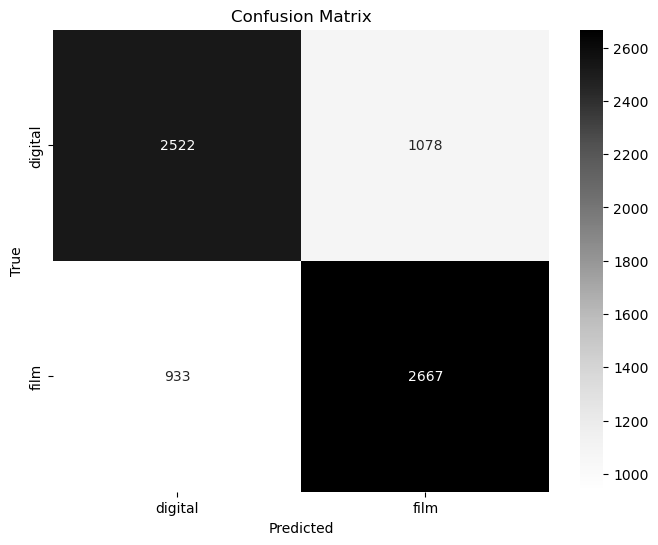

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greys', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()